## **SQL AND DATA WRANGLING PROJECT PACMANN AI**
- Worked on by ***Taufik Budi Wibowo***
- Dataset from Olist E-Commerce

**Outline**
- Import Library and Setting Connection
- Data Pre-Processing
- Data Cleaning
- Exploratory Data Analysis (EDA)
- RFM Analysis

***Data Schema***

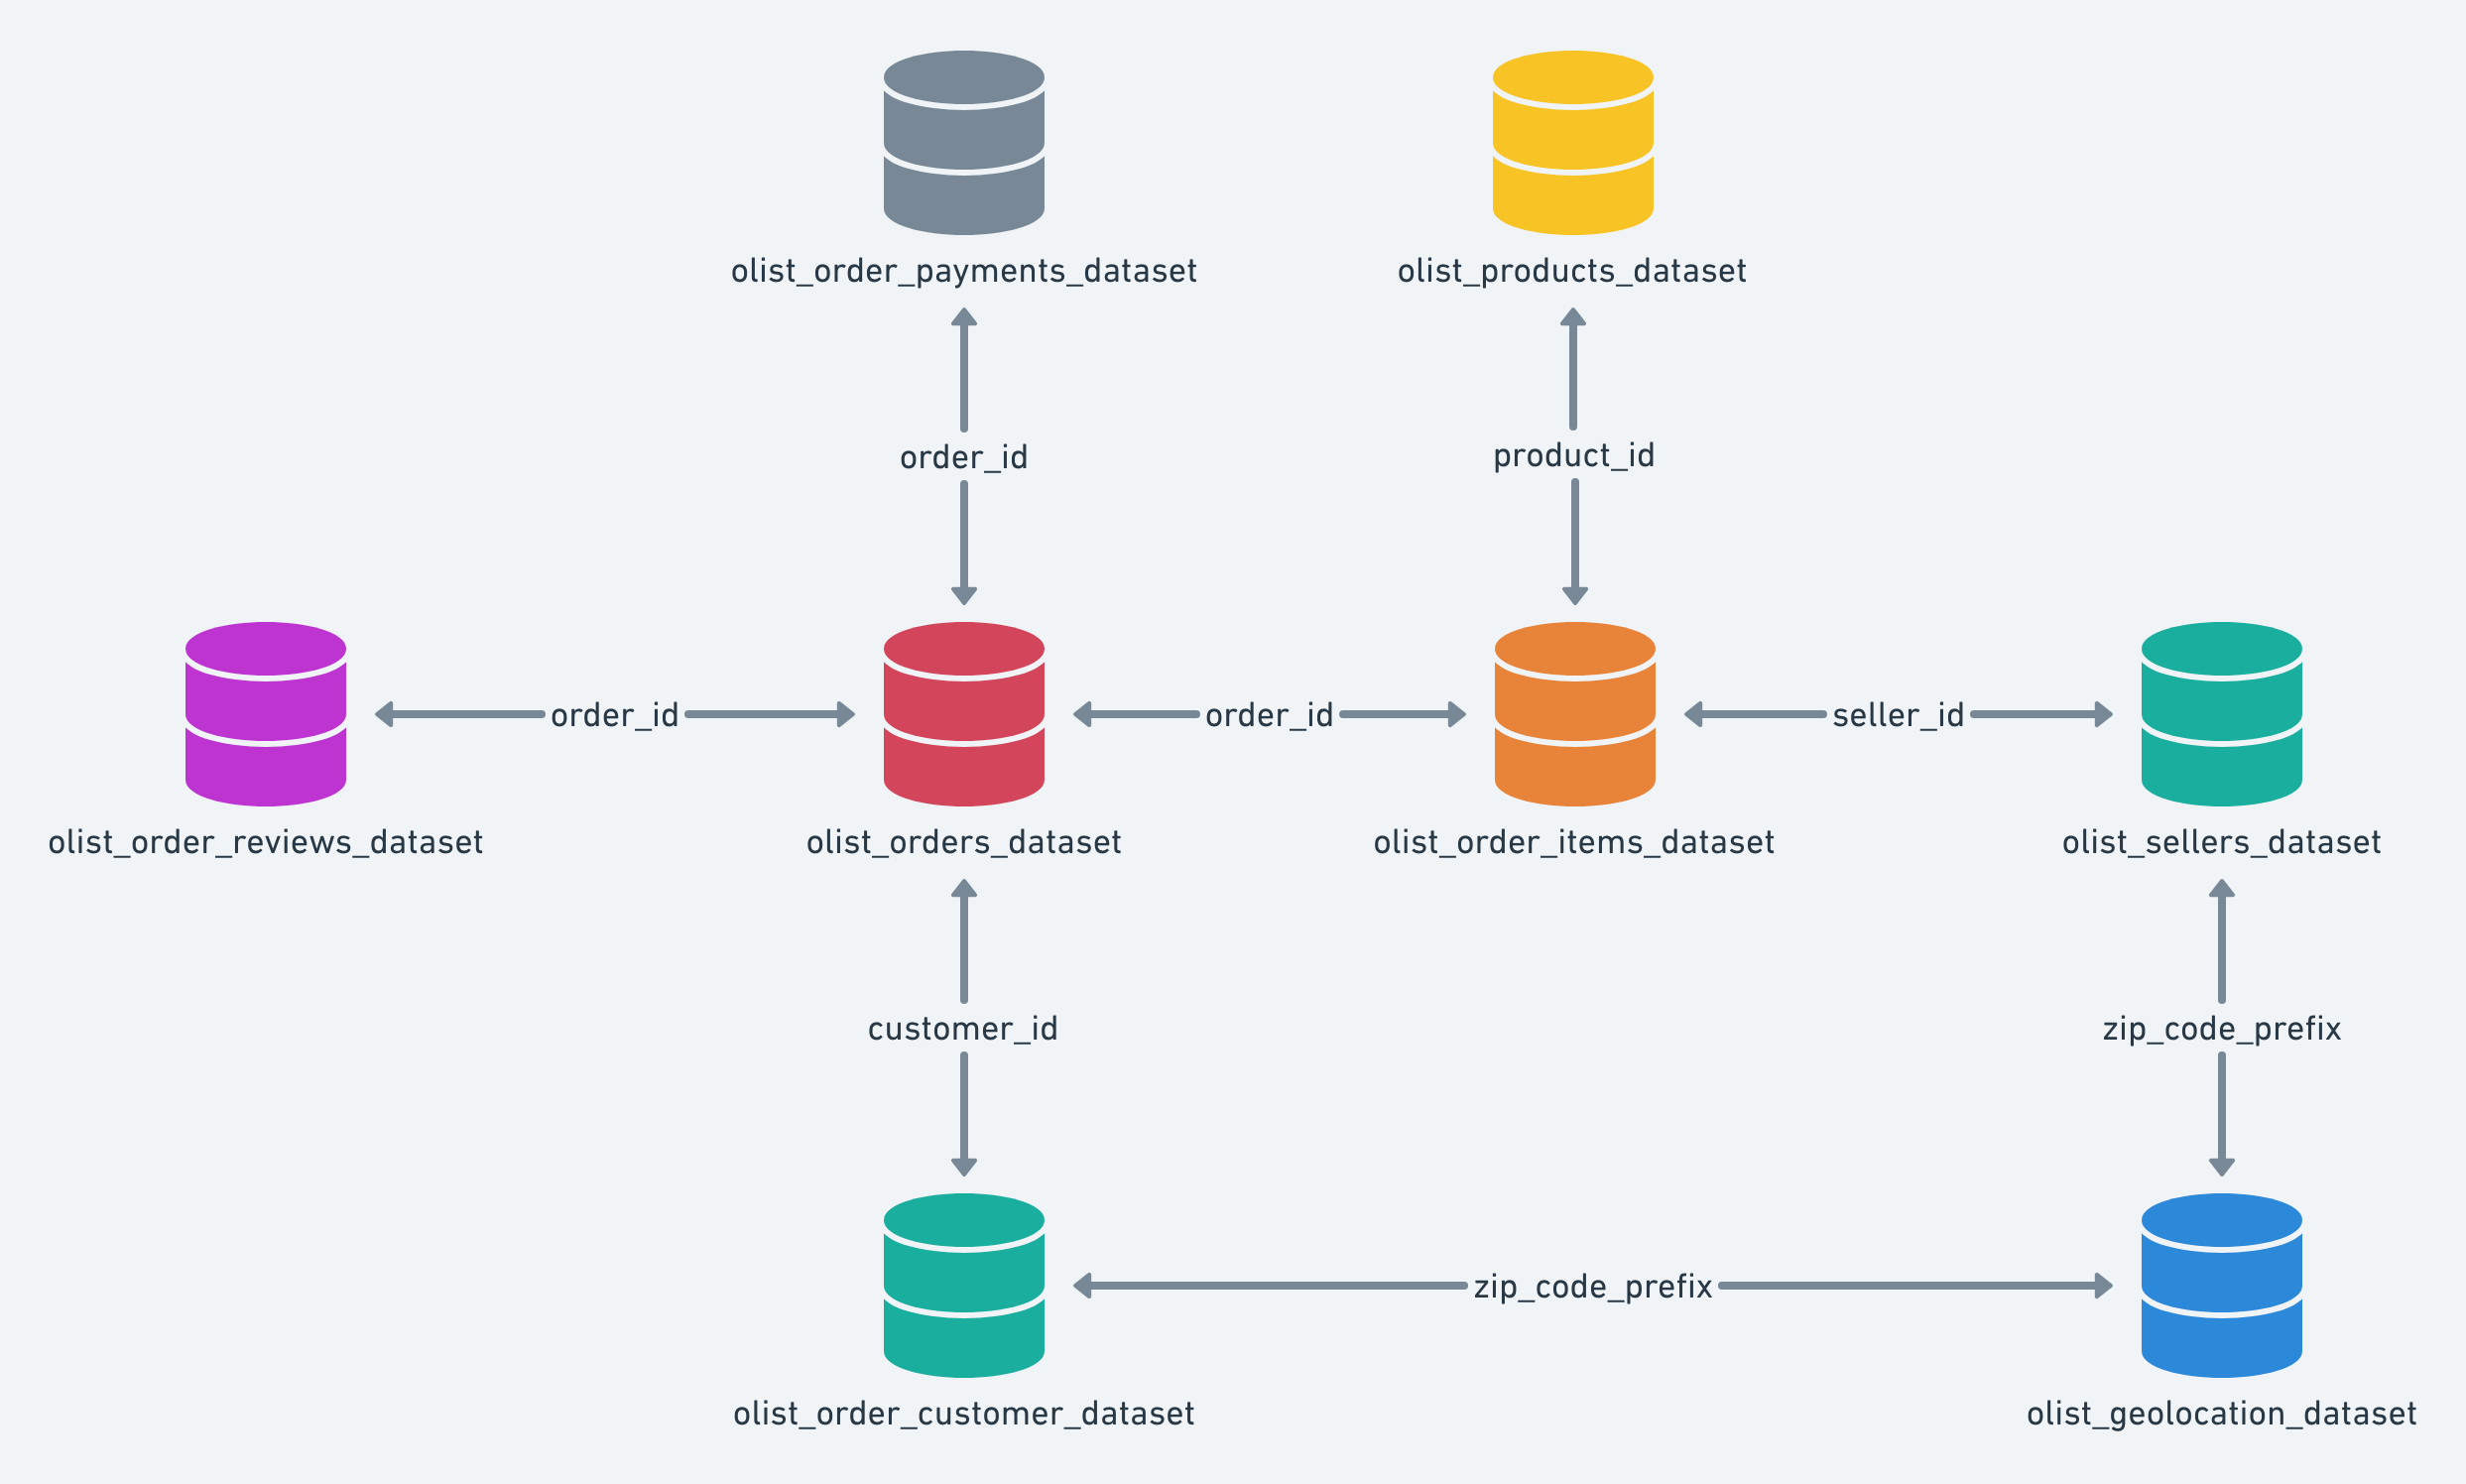

**1. Import Library and Setting Connection to SQlite**

In [306]:
#Import the library
import sqlite3
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [307]:
#Setting Connection
con = sqlite3.connect('e:\\Bootcamp Technical\\Project Data Wrangling\\olist.db')

**2. Data Pre-Processing**

In [308]:
#Display List of Table from Database
query = """
SELECT name 
FROM sqlite_master 
WHERE type = 'table';
"""
data = pd.read_sql(query, con)
data

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [309]:
#query customer data
query = """
SELECT
    customer_id,
    customer_unique_id,
    customer_city
FROM olist_order_customer_dataset;
"""
customer = pd.read_sql(query,con)
customer.info()
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


,customer_id,customer_unique_id,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas


In [310]:
#query order data
query = """
SELECT
    order_id,
    customer_id,
    order_purchase_timestamp
FROM olist_order_dataset
WHERE order_status <> 'canceled';
"""
order = pd.read_sql(query,con)
order.info()
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  98816 non-null  object
 1   customer_id               98816 non-null  object
 2   order_purchase_timestamp  98816 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [311]:
#Rename the column name
order.rename({'order_purchase_timestamp':'order_date'},axis=1,inplace=True)

In [312]:
#Apply the function to_datetime to parse the order date column
order['order_date'] = pd.to_datetime(order['order_date'])
order['month_purchase'] =order['order_date'].dt.strftime('%Y-%m')
order['hour'] = order['order_date'].dt.hour
order.info()
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        98816 non-null  object        
 1   customer_id     98816 non-null  object        
 2   order_date      98816 non-null  datetime64[ns]
 3   month_purchase  98816 non-null  object        
 4   hour            98816 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 3.4+ MB


,order_id,customer_id,order_date,month_purchase,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02,21


In [313]:
#query order items data
query = """
SELECT 
    order_id,
    product_id,
    payment_type,
    payment_value AS total_revenue,
    payment_value - price AS total_profit
FROM olist_order_items_dataset
INNER JOIN olist_order_payments_dataset USING(order_id);
"""
order_items = pd.read_sql(query,con)
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       117601 non-null  object 
 1   product_id     117601 non-null  object 
 2   payment_type   117601 non-null  object 
 3   total_revenue  117601 non-null  float64
 4   total_profit   117601 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.5+ MB


In [314]:
#query products data
query = """
SELECT
    product_id,
    product_category_name_english AS product_name
FROM product_category_name_translation
INNER JOIN olist_products_dataset USING(product_category_name);
"""
products = pd.read_sql(query,con)
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    32328 non-null  object
 1   product_name  32328 non-null  object
dtypes: object(2)
memory usage: 505.3+ KB


,product_id,product_name
0,00210e41887c2a8ef9f791ebc780cc36,health_beauty
1,0042f1a9a7e0edd1400c6cd0fda065f8,health_beauty
2,006619bbed68b000c8ba3f8725d5409e,health_beauty
3,00878d953636afec00d3e85d55a12e7f,health_beauty
4,008b0ec3de3638637099f97add750136,health_beauty


In [315]:
#Merging table which have order_id columns
orders = pd.merge(order,order_items, how='left', on='order_id')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117647 entries, 0 to 117646
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        117647 non-null  object        
 1   customer_id     117647 non-null  object        
 2   order_date      117647 non-null  datetime64[ns]
 3   month_purchase  117647 non-null  object        
 4   hour            117647 non-null  int32         
 5   product_id      117035 non-null  object        
 6   payment_type    117035 non-null  object        
 7   total_revenue   117035 non-null  float64       
 8   total_profit    117035 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 7.6+ MB


In [316]:
#Merging table which have customer_id columns
cust_orders = pd.merge(orders,customer, how='left', on='customer_id')
cust_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117647 entries, 0 to 117646
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            117647 non-null  object        
 1   customer_id         117647 non-null  object        
 2   order_date          117647 non-null  datetime64[ns]
 3   month_purchase      117647 non-null  object        
 4   hour                117647 non-null  int32         
 5   product_id          117035 non-null  object        
 6   payment_type        117035 non-null  object        
 7   total_revenue       117035 non-null  float64       
 8   total_profit        117035 non-null  float64       
 9   customer_unique_id  117647 non-null  object        
 10  customer_city       117647 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usage: 9.4+ MB


In [317]:
#Merging table which have product_id columns
cust_orders_prod = pd.merge(cust_orders,products, how='left', on='product_id')
cust_orders_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117647 entries, 0 to 117646
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            117647 non-null  object        
 1   customer_id         117647 non-null  object        
 2   order_date          117647 non-null  datetime64[ns]
 3   month_purchase      117647 non-null  object        
 4   hour                117647 non-null  int32         
 5   product_id          117035 non-null  object        
 6   payment_type        117035 non-null  object        
 7   total_revenue       117035 non-null  float64       
 8   total_profit        117035 non-null  float64       
 9   customer_unique_id  117647 non-null  object        
 10  customer_city       117647 non-null  object        
 11  product_name        115329 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 10.3+ MB


In [318]:
#Final table customer, orders, and products before data cleaning
cust_orders_prod.drop('product_id',axis=1,inplace=True)
cust_orders_prod[['total_revenue']]
cust_orders_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117647 entries, 0 to 117646
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            117647 non-null  object        
 1   customer_id         117647 non-null  object        
 2   order_date          117647 non-null  datetime64[ns]
 3   month_purchase      117647 non-null  object        
 4   hour                117647 non-null  int32         
 5   payment_type        117035 non-null  object        
 6   total_revenue       117035 non-null  float64       
 7   total_profit        117035 non-null  float64       
 8   customer_unique_id  117647 non-null  object        
 9   customer_city       117647 non-null  object        
 10  product_name        115329 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usage: 9.4+ MB


**3. Data Cleaning**

- Null Values

In [319]:
#Checking Null Values
missing = cust_orders_prod.isnull().sum()[cust_orders_prod.isnull().sum()>0]
missing_val = pd.DataFrame({'NaN_count':missing, 'NaN_percentage':missing/len(cust_orders_prod)})
missing_val = missing_val.sort_values(by='NaN_percentage', ascending=False)
missing_val

,NaN_count,NaN_percentage
product_name,2318,0.019703
payment_type,612,0.005202
total_revenue,612,0.005202
total_profit,612,0.005202


In [320]:
#Mapping columns with nan values
col_w_na = [
    'product_name',
    'payment_type',
    'total_revenue',
    'total_profit'
]
print(f'Number of columns with NA values: {len(col_w_na)}')

Number of columns with NA values: 4


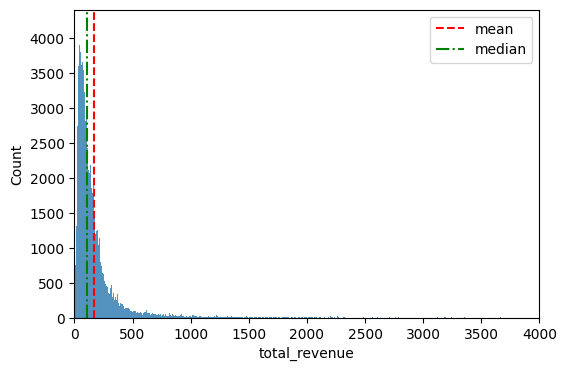

In [321]:
#Displaying the distribution of total_revenue column
plt.figure(figsize=(6, 4))
sns.histplot(data=cust_orders_prod, x='total_revenue')
plt.axvline(x=cust_orders_prod.total_revenue.mean(), color='r', linestyle='--', label='mean')
plt.axvline(x=cust_orders_prod.total_revenue.median(), color='g', linestyle='-.', label='median')
plt.xlim(0,4000)
plt.legend()
plt.show()

In [322]:
#Fill the null values on total_revenue column w/ mean
cust_orders_prod['total_revenue'] = cust_orders_prod['total_revenue'].fillna(cust_orders_prod['total_revenue'].mean())

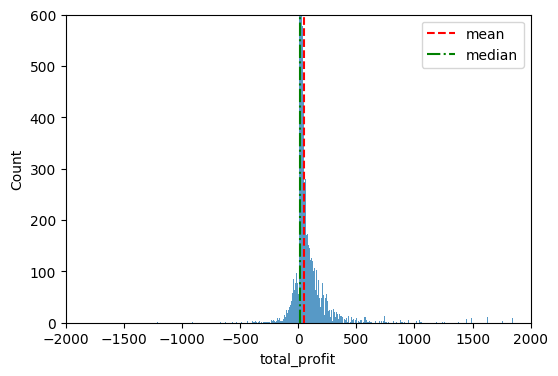

In [323]:
#Displaying the distribution of total_profit column
plt.figure(figsize=(6, 4))
sns.histplot(data=cust_orders_prod, x='total_profit')
plt.axvline(x=cust_orders_prod.total_profit.mean(), color='r', linestyle='--', label='mean')
plt.axvline(x=cust_orders_prod.total_profit.median(), color='g', linestyle='-.', label='median')
plt.xlim(-2000, 2000)
plt.ylim(0, 600)
plt.legend()
plt.show()

In [324]:
#Fill the null values on total_revenue column w/ mean
cust_orders_prod['total_profit'] = cust_orders_prod['total_profit'].fillna(cust_orders_prod['total_profit'].mean())

In [325]:
#Fill the missing value w/ unknown and modus
#Categorical data
cust_orders_prod['product_name'] = cust_orders_prod['product_name'].fillna('unknown')
cust_orders_prod['payment_type'] = cust_orders_prod['payment_type'].fillna(cust_orders_prod['payment_type'].mode()[0])

In [326]:
#Checking Null Values again
cust_orders_prod.isna().sum()

order_id              0
customer_id           0
order_date            0
month_purchase        0
hour                  0
payment_type          0
total_revenue         0
total_profit          0
customer_unique_id    0
customer_city         0
product_name          0
dtype: int64

- Duplicates Value

In [327]:
#Checking duplicates values
cust_orders_prod[cust_orders_prod.duplicated(keep=False)].head(10)

,order_id,customer_id,order_date,month_purchase,hour,payment_type,total_revenue,total_profit,customer_unique_id,customer_city,product_name
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,2017-05-16 19:41:10,2017-05,19,credit_card,259.06,160.06,f2a85dec752b8517b5e58a06ff3cd937,rio de janeiro,garden_tools
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,2017-05-16 19:41:10,2017-05,19,credit_card,259.06,160.06,f2a85dec752b8517b5e58a06ff3cd937,rio de janeiro,garden_tools
59,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,2018-07-26 14:39:59,2018-07,14,credit_card,151.04,91.04,c77154776ead8e798c2d684205938f71,porto alegre,sports_leisure
60,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,2018-07-26 14:39:59,2018-07,14,credit_card,151.04,91.04,c77154776ead8e798c2d684205938f71,porto alegre,sports_leisure
65,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,2018-03-09 14:50:15,2018-03,14,credit_card,91.68,68.69,ddf60e20e6e262e2136801ce5cd628b0,aracaju,telephony
66,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,2018-03-09 14:50:15,2018-03,14,credit_card,91.68,68.69,ddf60e20e6e262e2136801ce5cd628b0,aracaju,telephony
75,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,2018-01-07 21:44:54,2018-01,21,credit_card,824.76,494.86,6a0e43f0d7e1b5539e4c58a26ebe35da,boninal,construction_tools_construction
76,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,2018-01-07 21:44:54,2018-01,21,credit_card,824.76,494.86,6a0e43f0d7e1b5539e4c58a26ebe35da,boninal,construction_tools_construction
78,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,2018-06-18 16:02:23,2018-06,16,credit_card,392.60,307.70,a464f750556546a0989d9326ec003ccf,sao paulo,auto
79,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,2018-06-18 16:02:23,2018-06,16,credit_card,392.60,307.70,a464f750556546a0989d9326ec003ccf,sao paulo,auto


In [328]:
#Drop the duplicates value
cust_orders_prod.drop_duplicates(keep='first', inplace=True, ignore_index=True)

- Checking Outliers

In [329]:
#Checking the outliers from description
cust_orders_prod.describe()

,order_date,hour,total_revenue,total_profit
count,105392,105392.000000,105392.000000,105392.000000
mean,2017-12-30 10:25:39.175506688,14.783095,157.066515,32.229639
min,2016-09-04 21:15:19,0.000000,0.000000,-3763.560000
25%,2017-09-11 11:28:21,11.000000,58.180000,13.070000
50%,2018-01-17 16:46:11.500000,15.000000,102.920000,17.060000
75%,2018-05-03 22:09:30.500000,19.000000,175.080000,26.430000
max,2018-09-03 09:06:57,23.000000,13664.080000,11984.080000
std,NaN,5.335734,216.284187,100.949521


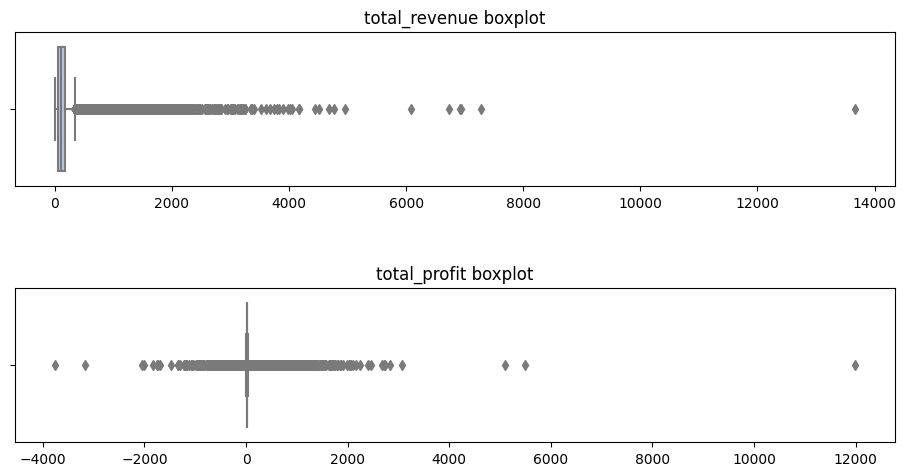

In [330]:
#Check the outlier from boxplot
columns = ['total_revenue','total_profit']
n = 1

plt.figure(figsize=(10,8))

for x in columns:
    plt.subplot(3,1,n)
    sns.boxplot(data=cust_orders_prod, x=x ,palette='pastel')
    plt.xlabel(None)
    plt.title(f'{x} boxplot')
    n += 1

plt.tight_layout(pad=4)
plt.show()

In [331]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f'lower:{lwr_bound} and upper:{upr_bound}')

    for i in data:
        if (i<lwr_bound or i>upr_bound): outliers.append(i)
    return outliers

In [332]:
outlier_col = ['total_revenue','total_profit']

for col in outlier_col:
    outlier = detect_outliers_iqr(cust_orders_prod[col])

    print('number of outliers in column', f"'{str(col)}'",'is',len(outlier))
    print()

lower:-117.17000000000002 and upper:350.43000000000006
number of outliers in column 'total_revenue' is 8138

lower:-6.970000000000017 and upper:46.47000000000001
number of outliers in column 'total_profit' is 21356



In [333]:
def capping_outlier(col):
    lwr_limit = cust_orders_prod[col].quantile(0.02)
    upr_limit = cust_orders_prod[col].quantile(0.98)

    print(str(col))
    print(f'lwr:{lwr_limit} and upr:{upr_limit}')
    print()

    cust_orders_prod[col] = np.where(cust_orders_prod[col]>upr_limit,upr_limit,
                                     np.where(cust_orders_prod[col]<lwr_limit,lwr_limit,cust_orders_prod[col]))

In [334]:
for col in outlier_col:
    capping_outlier(col)

total_revenue
lwr:16.646400000000003 and upr:751.05

total_profit
lwr:-58.879999999999995 and upr:229.7153999999998



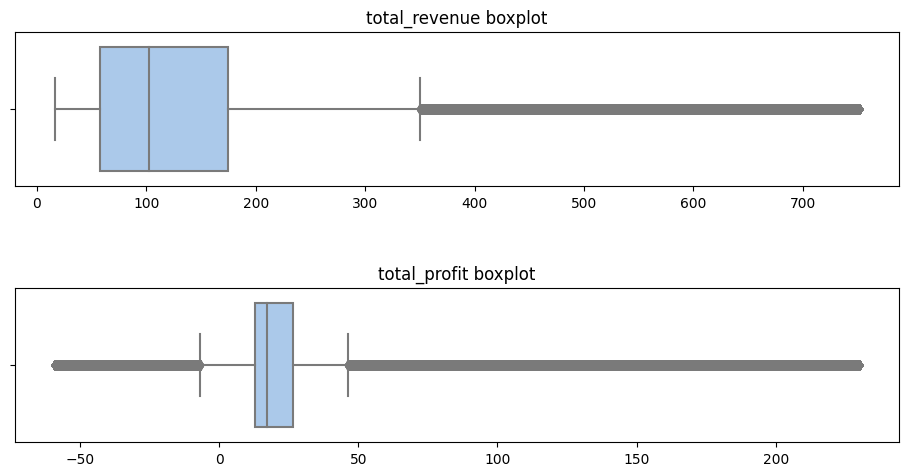

In [335]:
#Check the outlier again from boxplot 
columns = ['total_revenue','total_profit']
n = 1

plt.figure(figsize=(10,8))

for x in columns:
    plt.subplot(3,1,n)
    sns.boxplot(data=cust_orders_prod, x=x ,palette='pastel')
    plt.xlabel(None)
    plt.title(f'{x} boxplot')
    n += 1

plt.tight_layout(pad=4)
plt.show()

In [336]:
#Check after capping outliers
print(cust_orders_prod['total_revenue'].describe())
print('----------------------------')
print(cust_orders_prod['total_profit'].describe())

count    105392.000000
mean        147.206557
std         143.760672
min          16.646400
25%          58.180000
50%         102.920000
75%         175.080000
max         751.050000
Name: total_revenue, dtype: float64
----------------------------
count    105392.000000
mean         29.825116
std          46.284646
min         -58.880000
25%          13.070000
50%          17.060000
75%          26.430000
max         229.715400
Name: total_profit, dtype: float64


**4. Exploratory Data Analysis (EDA)**

- What is the best month of sales and how much the profit?

In [337]:
print(monthly_sales.sum())
print(monthly_profit.sum())

15514393.452149887
3143328.6590669625


2017-11 is the best year-month of sales and the revenue is $1177337 with profit $251608


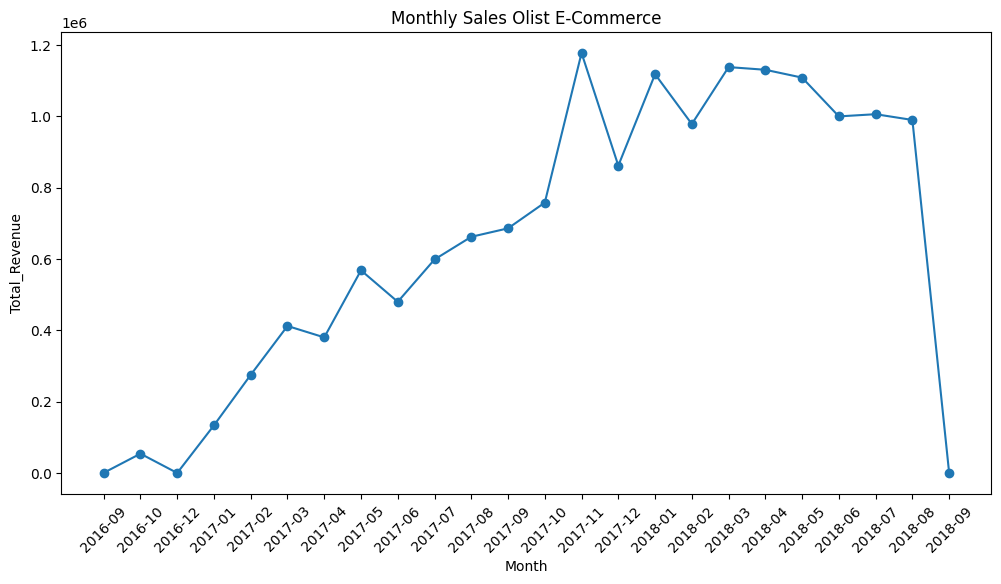

In [338]:
#1

monthly_sales = cust_orders_prod.groupby('month_purchase')['total_revenue'].sum()
monthly_profit = cust_orders_prod.groupby('month_purchase')['total_profit'].sum()
best_month_index = monthly_sales.idxmax()
best_month_revenue = monthly_sales.loc[best_month_index]
best_month_profit = monthly_profit.loc[best_month_index]
print(f'{best_month_index} is the best year-month of sales and the revenue is ${best_month_revenue:.0f} with profit ${best_month_profit:.0f}')

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total_Revenue')
plt.title('Monthly Sales Olist E-Commerce')
plt.xticks(rotation=45)
plt.show()

- What is the top 10 product sales from olist e-commerce?

Product health_beauty is the best product sales with the revenue is $1394226


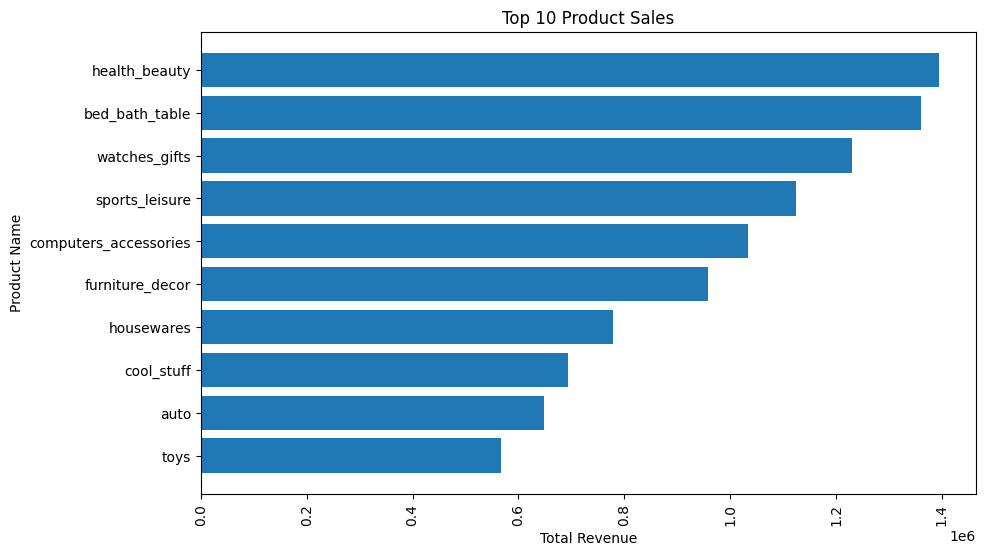

In [339]:
#2

top_10_prod = cust_orders_prod[['product_name','total_revenue']].groupby(['product_name']).sum().sort_values(by=['total_revenue'], ascending=False).head(10)
top_10_prod = top_10_prod.reset_index()
top_10_prod = top_10_prod.iloc[::-1]
best_product = top_10_prod.loc[0,'product_name']
best_product_revenue = top_10_prod.loc[0,'total_revenue']
print(f'Product {best_product} is the best product sales with the revenue is ${best_product_revenue:.0f}')

plt.figure(figsize=(10,6))
plt.barh(top_10_prod['product_name'],top_10_prod['total_revenue'])
plt.title('Top 10 Product Sales')
plt.ylabel('Product Name')
plt.xlabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

*Average order value (AOV) refers to the average amount spent by customers per transaction.*

*based on : https://www.shopify.com/id/blog/average-order-value*

Most product name that customer spend much money is computers


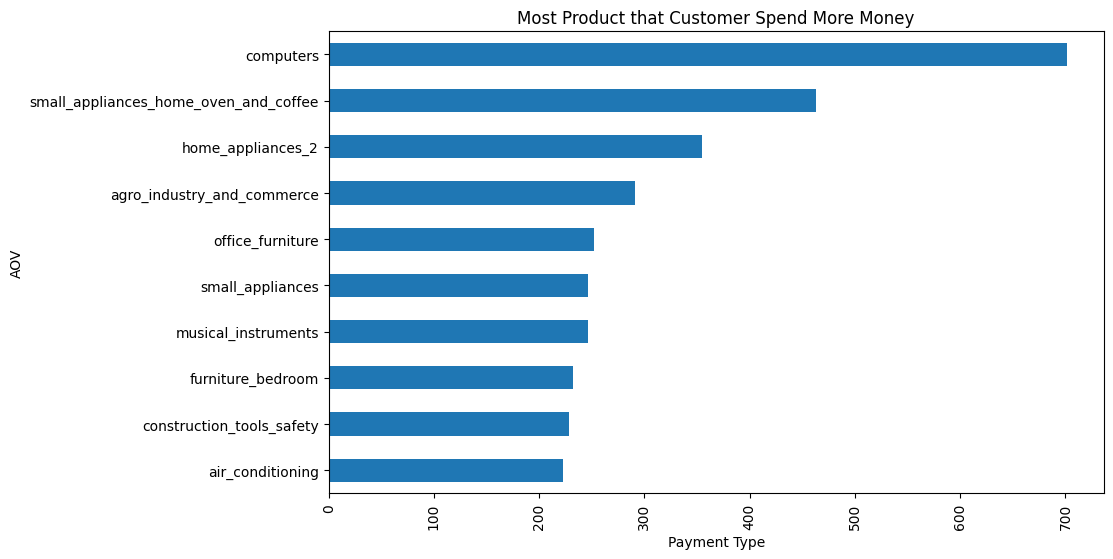

In [340]:
product = cust_orders_prod.groupby('product_name')['total_revenue'].sum()
order_count = cust_orders_prod['product_name'].value_counts()
aov = (product/order_count).sort_values(ascending=False).head(10)
#aov_filter = aov.drop('unknown', errors='ignore')
print(f'Most product name that customer spend much money is {aov.index[0]}')

plt.figure(figsize=(10,6))
aov.sort_values(ascending=True).plot(kind='barh')
plt.title('Most Product that Customer Spend More Money')
plt.ylabel('AOV')
plt.xlabel('Payment Type')
plt.xticks(rotation=90)
plt.show()

- What is the most payment type that customer use by the aov value?

Most payment type that customer use is credit_card


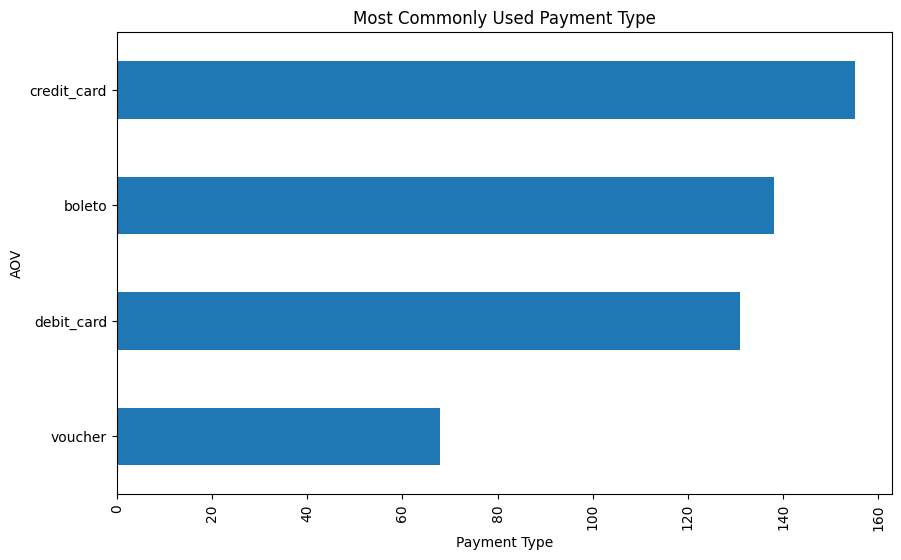

In [341]:
#3

#AOV
payment = cust_orders_prod.groupby('payment_type')['total_revenue'].sum()
order_count = cust_orders_prod['payment_type'].value_counts()
aov = (payment/order_count).sort_values(ascending=False)
aov_filter = aov.drop('unknown', errors='ignore')
print(f'Most payment type that customer use is {aov.index[0]}')

plt.figure(figsize=(10,6))
aov_filter.sort_values(ascending=True).plot(kind='barh')
plt.title('Most Commonly Used Payment Type')
plt.ylabel('AOV')
plt.xlabel('Payment Type')
plt.xticks(rotation=90)
plt.show()


- What is top 10 city with high product sales?

sao paulo is the highest city with count of product sales with total order 16459


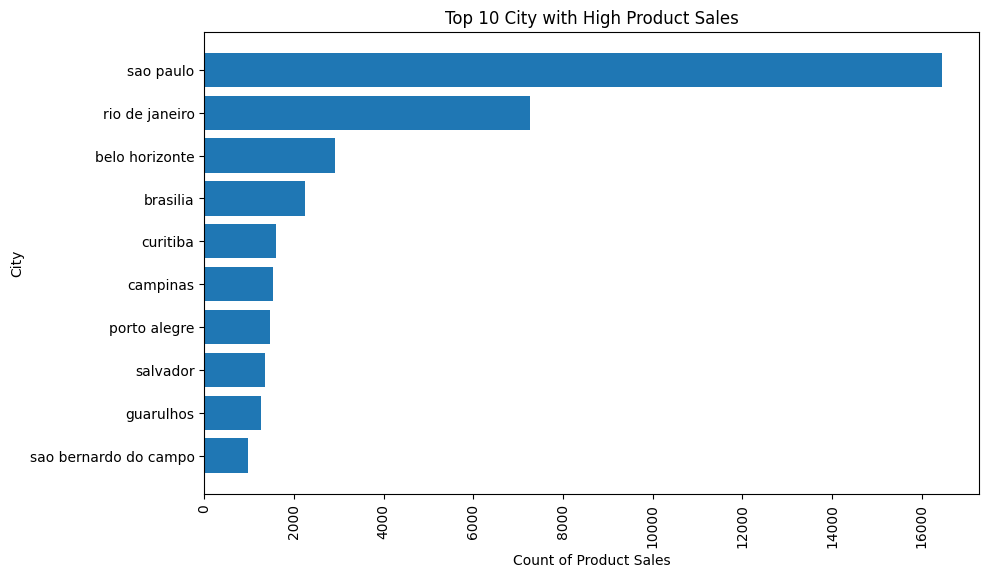

In [342]:
#4

top_10_city = cust_orders_prod[['customer_city','order_id']].groupby(['customer_city']).count().sort_values(by=['order_id'], ascending=False).head(10)
top_10_city = top_10_city.reset_index()
top_10_city = top_10_city.iloc[::-1]
best_city = top_10_city.loc[0,'customer_city']
best_city_sales = top_10_city.loc[0,'order_id']
print(f'{best_city} is the highest city with count of product sales with total order {best_city_sales}')

plt.figure(figsize=(10,6))
plt.barh(top_10_city['customer_city'],top_10_city['order_id'])
plt.title('Top 10 City with High Product Sales')
plt.ylabel('City')
plt.xlabel('Count of Product Sales')
plt.xticks(rotation=90)
plt.show()

- What time we should display the product?

hour
16    7090
11    6950
14    6944
13    6881
15    6800
Name: order_id, dtype: int64


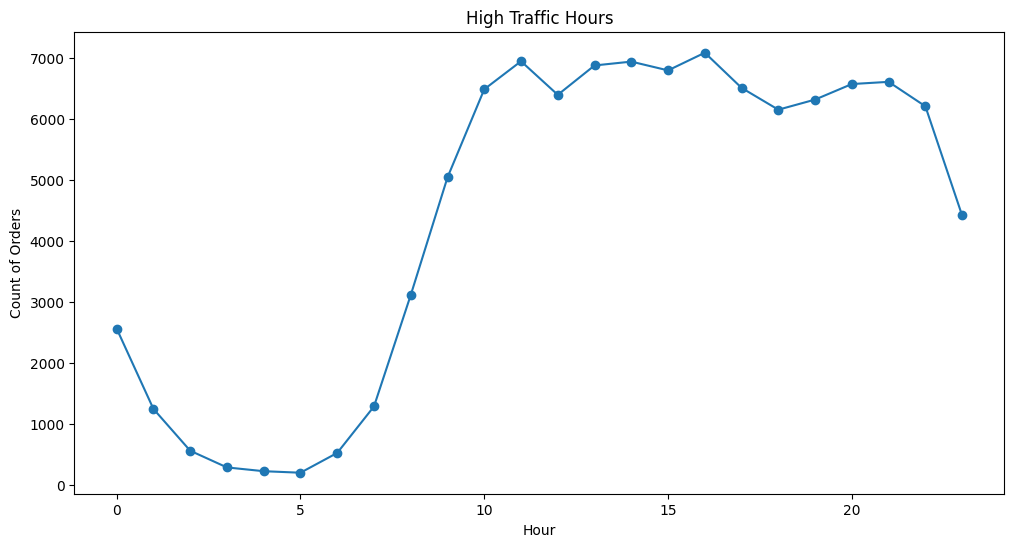

In [343]:
#5

hours = cust_orders_prod.groupby('hour')['order_id'].count()
print(hours.sort_values(ascending=False).head(5))

plt.figure(figsize=(12,6))
plt.plot(hours.index, hours.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('High Traffic Hours')
plt.show()

**5. Recency, Frequency, Monetary Analysis**

reference : https://www.kaggle.com/code/marta99/olist-e-commerce-eda-and-rfm-analysis#RFM-ANALYSIS

- Recency

In [344]:
#Define current date
current_date = cust_orders_prod['order_date'].max()+dt.timedelta(days = 1)
print(f'Current date is : {current_date}')
print('-'*30)

#Obtain the date of the most recent purchase in a new df
recency = cust_orders_prod.groupby(['customer_unique_id'], as_index=False)['order_date'].max()

#Obtain recency value for each customer
recency['recency'] = recency['order_date'].apply(lambda x:(current_date - x).days)
recency.head()

Current date is : 2018-09-04 09:06:57
------------------------------


,customer_unique_id,order_date,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293


- Frequency

In [345]:
#Obtain the number of unique orders by customer
freq = pd.DataFrame(cust_orders_prod.groupby(['customer_unique_id'], as_index=False).agg({'order_id':'nunique'}))

#Rename column
freq.rename({'order_id':'frequency'},axis=1, inplace=True)
freq.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


- Monetary

In [346]:
#Calculate payment value group by cust_id
monetary = cust_orders_prod.groupby('customer_unique_id', as_index=False)['total_revenue'].sum()

#Rename column
monetary.rename({'total_revenue':'monetary'},axis=1, inplace=True)
monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


- Data Preparation RFM

In [347]:
rfm = recency.merge(freq, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id')
rfm.head()

,customer_unique_id,order_date,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89


In [348]:
rfm.drop('order_date', axis=1, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


- Checking Outlier in RFM Data

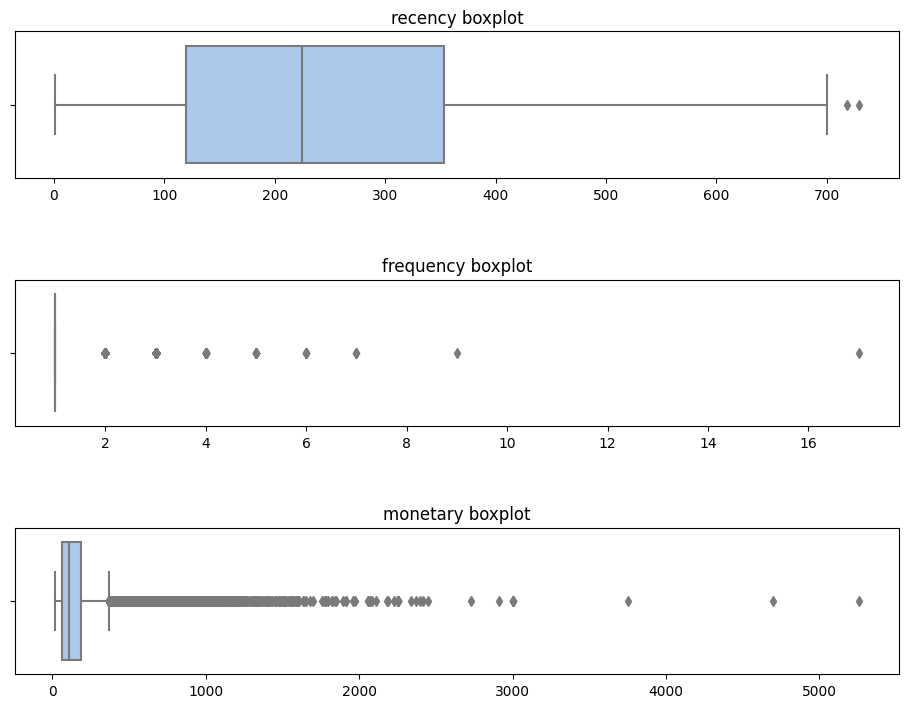

In [349]:
#Check the outlier from boxplot
columns = ['recency','frequency','monetary']
n = 1

plt.figure(figsize=(10,8))

for x in columns:
    plt.subplot(3,1,n)
    sns.boxplot(data=rfm, x=x ,palette='pastel')
    plt.xlabel(None)
    plt.title(f'{x} boxplot')
    n += 1

plt.tight_layout(pad=4)
plt.show()

In [350]:
#Remove the outlier
def remove_outlier(input, column_name):
    q1 = input[column_name].quantile(0.25)
    q3 = input[column_name].quantile(0.75)
    iqr = q3-q1
    minbound = q1-1.5*iqr
    maxbound = q3+1.5*iqr
    idx_outliers = input.loc[(input[column_name]<minbound) | 
                             (input[column_name]>maxbound)].index
    input = pd.DataFrame(input.drop(idx_outliers.to_list(), axis=0, inplace=True))
    return input

#Apply the function to the outlier columns
for i in ['recency','frequency','monetary']:
    remove_outlier(rfm, i)

- **Do RFM Anaysis**

In [351]:
#Make the copy from RFM dataframe
rfm2 = rfm.copy()
rfm2 = rfm2.set_index('customer_unique_id')
rfm2

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
0000f46a3911fa3c0805444483337064,542,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,250,1,167.32
fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
ffff371b4d645b6ecea244b27531430a,573,1,112.46


In [352]:
#discretize variables into equal_sized bucket
#recency & monetary
rfm2['recency_score'] = pd.qcut(rfm2['recency'], 5, labels=[5,4,3,2,1])
rfm2['monetary_score'] = pd.qcut(rfm2['monetary'], 5, labels=[1,2,3,4,5])

#frequency
rfm2['frequency_score'] = pd.qcut(rfm2['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

In [353]:
#Concatenate all scores
rfm2['rfm_scores'] = rfm2.recency_score.astype(str) + rfm2.frequency_score.astype(str) + rfm2.monetary_score.astype(str)
rfm2.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_scores
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,4,1,414
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,542,1,86.22,1,3,1,113
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,5,1,215


In [354]:
#Maping the rfm scores

map = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

rfm2['segmentation'] = rfm2['rfm_scores'].replace(map, regex=True)
rfm2.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_scores,segmentation
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,4,1,414,Promising
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411,New Customers
0000f46a3911fa3c0805444483337064,542,1,86.22,1,3,1,113,Cannot Lose Them
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211,Hibernating customers
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,5,1,215,Cannot Lose Them


In [355]:
#Creating RFM Stat
rfm_stat = rfm2[['segmentation','recency','frequency','monetary']].groupby('segmentation').agg(['mean','median','min','max','count'])
rfm_stat['ratio'] = (100*rfm_stat['recency']['count']/rfm_stat['recency']['count'].sum()).round(2)
rfm_stat

recency                         frequency          
                             mean median  min  max  count      mean median   
segmentation                                                                 
About To Sleep         285.113977  283.0  185  390   5273       1.0    1.0  \
At Risk                393.379681  377.0  275  700  14794       1.0    1.0   
Cannot Lose Them       442.329495  446.0  275  700   5384       1.0    1.0   
Champions               91.332587   87.0    6  184   4910       1.0    1.0   
Hibernating customers  348.311484  333.0  185  700   7567       1.0    1.0   
Lost customers         482.253403  476.0  391  700   4187       1.0    1.0   
Loyal                  184.427619  200.0    5  274   5402       1.0    1.0   
Need Attention         162.509165  185.0    6  274   5401       1.0    1.0   
New Customers          128.872606  133.0    5  274   4647       1.0    1.0   
Potential Loyalist     136.636745  137.0    5  274  16198       1.0    1.0   
Promising              112.092653   99.0    5  274  10998       1.0    1.0   

                                        monetary                              
                      min max  count        mean   median       min     max   
segmentation                                                                  
About To Sleep          1   1   5273   49.185895   43.000   16.6464  117.85  \
At Risk                 1   1  14794  148.326908  133.345   52.4900  356.54   
Cannot Lose Them        1   1   5384  173.516713  157.350   79.9300  356.12   
Champions               1   1   4910  196.918870  183.250  117.8800  356.11   
Hibernating customers   1   1   7567   72.336676   69.540   16.6464  117.85   
Lost customers          1   1   4187   42.869612   41.640   16.6464   79.71   
Loyal                   1   1   5402  185.352261  173.840   80.0200  356.24   
Need Attention          1   1   5401  154.452525  141.730   79.8000  356.45   
New Customers           1   1   4647   49.923578   48.300   16.6464   79.72   
Potential Loyalist      1   1  16198   67.297581   65.350   16.6464  117.85   
Promising               1   1  10998  149.993245  138.720   16.6464  356.53   

                              ratio  
                       count         
segmentation                         
About To Sleep          5273   6.22  
At Risk                14794  17.45  
Cannot Lose Them        5384   6.35  
Champions               4910   5.79  
Hibernating customers   7567   8.93  
Lost customers          4187   4.94  
Loyal                   5402   6.37  
Need Attention          5401   6.37  
New Customers           4647   5.48  
Potential Loyalist     16198  19.11  
Promising              10998  12.98

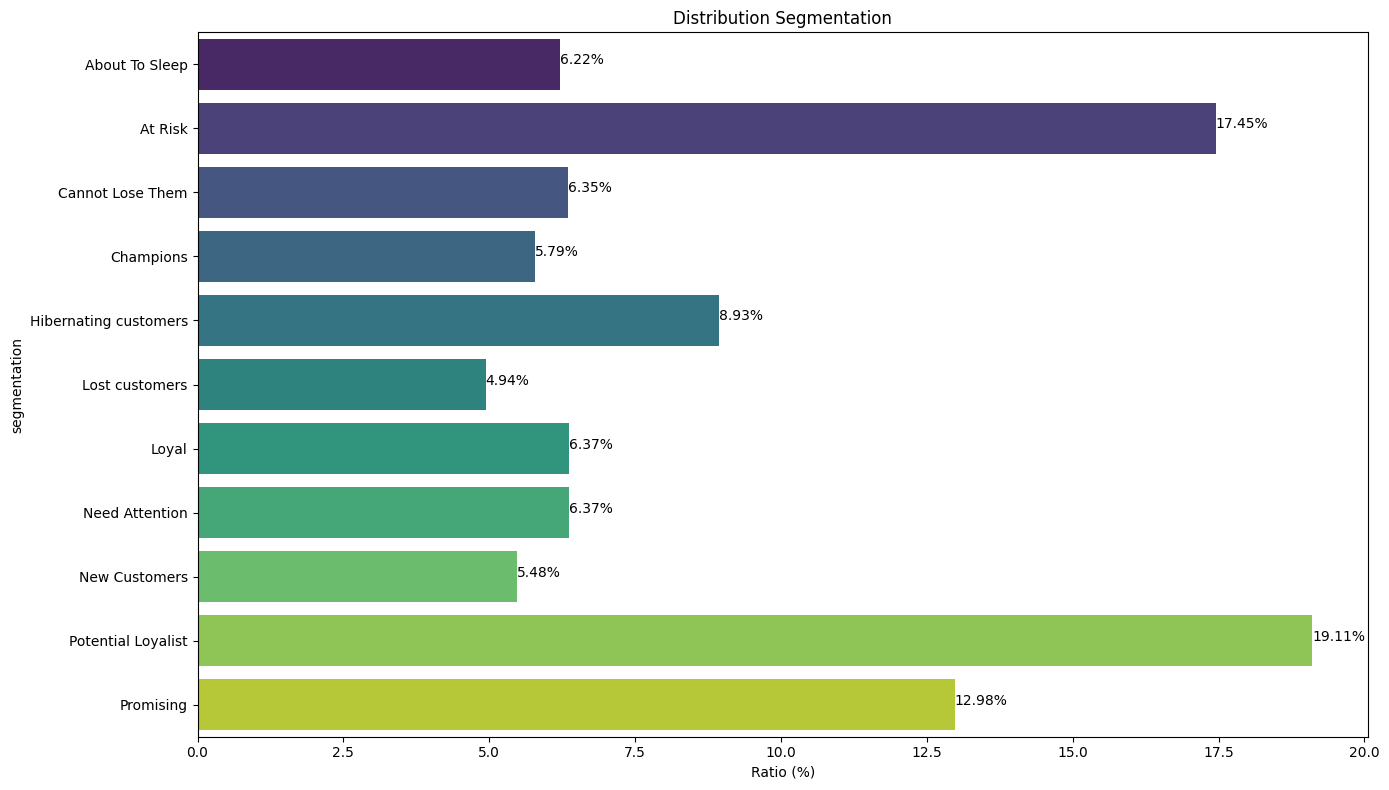

In [356]:
#Visualize the RFM to know Customer Segmentation
plt.figure(figsize=(14,8))

plot = sns.barplot(x='ratio', y=rfm_stat.index, 
                   data = rfm_stat, palette='viridis')

for i, v in enumerate(rfm_stat['ratio']):
    plot.text(v, i, f'{v}%', color='black', ha='left')

plt.title('Distribution Segmentation')
plt.xlabel('Ratio (%)')
plt.tight_layout()